<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-19-Fraud-Detection-Excellence-A-Deep-Exploration/blob/main/Chapter_19_Classification_Techniques_For_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Project: Predict the Churn Rate of Customers**

## CODING TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics


In [ ]:
# Read the CSV file
telecom_df = pd.read_csv("telecom_churn.csv")

In [ ]:
# Load the top 5 instances
telecom_df.head()

In [ ]:
# Load the bottom 5 instances
telecom_df.tail()

In [ ]:
# Check the shape of the dataframe
telecom_df.shape

In [ ]:
# Display the feature columns
telecom_df.columns

In [ ]:
# Obtain the summary of the dataframe data types
telecom_df.dtypes

In [ ]:
import pandas as pd

# Assuming telecom_df is your DataFrame

unique_value = []
most_common = []
least_common = []
column_name = []
column_type = []

# Iterate through the columns
for col in telecom_df.columns:
    # Append column name
    column_name.append(str(col))

    # Append number of unique values and column data type
    unique_value.append(telecom_df[col].nunique())
    column_type.append(str(telecom_df[col].dtype))

    # Calculate value counts
    value_counts = telecom_df[col].value_counts()

    # Check if value_counts is not empty
    if not value_counts.empty:
        # Get the most and least common value and its count
        most_common_value, most_common_count = value_counts.idxmax(), value_counts.max()
        least_common_value, least_common_count = value_counts.idxmin(), value_counts.min()

        most_common.append(f"{most_common_value} ({most_common_count})")
        least_common.append(f"{least_common_value} ({least_common_count})")
    else:
        # In case of empty value_counts (all elements are NaN)
        most_common.append('NaN')
        least_common.append('NaN')

# Create a summary table
table = pd.DataFrame({
    'Column Name': column_name,
    'Unique Values': unique_value,
    'Most Common': most_common,
    'Least Common': least_common,
    'Data Type': column_type
})

# Sort the table based on the number of unique values
table = table.sort_values('Unique Values', ascending=False)
table


,Column Name,Unique Values,Most Common,Least Common,Data Type
3,phone_number,5000,2845 (1),2845 (1),int64
7,total_day_minutes,1961,189.3 (10),114.6 (1),float64
9,total_day_charge,1961,32.18 (10),19.48 (1),float64
10,total_eve_minutes,1879,169.9 (10),213.5 (1),float64
13,total_night_minutes,1853,188.2 (11),218.1 (1),float64
12,total_eve_charge,1659,15.9 (15),7.87 (1),float64
15,total_night_charge,1028,9.66 (19),2.76 (1),float64
1,account_length,218,90 (65),243 (1),int64
18,total_intl_charge,170,3.0 (90),5.21 (1),float64
16,total_intl_minutes,170,11.1 (90),19.3 (1),float64


Based on the dataset information provided, here are the observations:

1. **Phone Number (Column 3):** Each of the 5,000 phone numbers appears to be unique. This suggests that the phone number is an identifier for each record.

2. **Call Durations and Charges (Columns 7, 9, 10, 12, 13, 15):** These columns represent various aspects of call durations (in minutes) and corresponding charges for day, evening, and night calls. The range of unique values indicates diversity in usage patterns among customers.

3. **Account Length (Column 1):** Represents the duration of the account's existence, with 218 unique values. The most common account length is 90 days.

4. **International Charges and Minutes (Columns 16, 18):** Reflects international call usage with 170 unique values in both minutes and corresponding charges. The most common value is 11.1 minutes and a charge of 3.0.

5. **Call Frequencies (Columns 8, 11, 14):** Represents the number of calls made during different times of the day. There's a moderate range of unique values, indicating varied calling behavior.

6. **State (Column 0):** With 51 unique values, it likely represents the U.S. states and territories. The most common state has 158 occurrences.

7. **Number of Voicemail Messages (Column 6):** This varies significantly among customers, with the majority not using voicemail (0 messages).

8. **Total Intl Calls (Column 17):** Shows the number of international calls made, with a relatively small range (21 unique values).

9. **Customer Service Calls (Column 19):** Reflects how often customers contact customer service, with a maximum of 10 different values. Most customers have made 1 customer service call.

10. **Area Code (Column 2):** There are only 3 unique values, which could be categorical representing different geographical regions.

11. **Voice Mail and International Plans (Columns 5, 4):** Binary variables indicating the subscription status of voice mail and international plans.

12. **Class (Column 20):** A binary target variable, possibly indicating customer churn, with '0' being the majority class.

Overall, the dataset seems to cover various aspects of telecommunication customer behavior, including usage patterns, service plan subscriptions, and customer service interactions. The class distribution suggests a potential classification problem, possibly predicting customer churn or a similar binary outcome. The diversity in call patterns and service plan choices indicates good variability in the data, which is beneficial for predictive modeling. However, the imbalance in the target variable (class) needs to be addressed during modeling.

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **What is the maximum and average daily minutes?**

# CODING TASK #2: PERFORM DATA VISUALIZATION

In [ ]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [ ]:
telecom_df["class"].value_counts()

In [ ]:
plt.figure(figsize = [10, 10])
telecom_df["class"].value_counts().plot(kind='pie')

In [ ]:
# Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

In [ ]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the KDE plot showing evening charges for both retained and churned customers**

# CODING TASK #3: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

In [ ]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

In [ ]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [ ]:
# The above graph is generated by Random Forest algorithm
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# CODING TASK #4: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

In [ ]:
y_predict = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Print out the confusion Matrix and comment on the results**


# CODING TASK #5: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

In [ ]:
y_predict = model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #7: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
y_predict = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

# CODING TASK #8: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

In [ ]:
y_predict = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #9: COMPARE TRAINED CLASSIFIER MODELS AND CONCLUDING REMARKS

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
model_LR.predict_proba(X_test)
# The first element is the probability that the output will be 0
# The second element is the probabiliy that the output will be 1

In [ ]:
model_LR.predict_proba(X_test)[:, 1]

In [ ]:
y_test

In [ ]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [ ]:
fpr1

In [ ]:
tpr1

In [ ]:
thresh1

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

In [ ]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# GREAT JOB!

# **Lab Project: Detecting Fraudulent Transactions Using Machine Learning**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.



There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- fraud (1=yes, 0=no)


Complete the following tasks:
1. Import the "UCI_Credit_Card.csv" dataset
2. Perform Exploratory Data analysis and visualization (feel free to pick any reasonable data visualizations)
3. Prepare the data for model training and split it into training and testing
4. Train and evaluate an XG-Boost classifier model
5. Train and evaluate a Support Vector Machine classifier model
6. Train and evaluate a Naive Bayes classifier model
7. Train and evaluate a logistic regression model
8. Train and evaluate a Random Forest classifier model
9. Train and evaluate a K-Nearest Neighbors classifier model
10. Plot the ROC curve for all classifier and calculate the AUC
11. Which model performs the best?



Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.



# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **What is the maximum and average daily minutes?**

In [ ]:
# Display the statistical details of the dataframe
telecom_df.describe()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the KDE plot showing evening charges for both retained and churned customers**

In [ ]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Print out the confusion Matrix and comment on the results**


In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

sqrt((1-2)^2 + (3-3)^2)= 1

# FINAL CAPSTONE PROJECT SOLUTION

# FINAL PROJECT TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('UCI_Credit_Card.csv')


In [ ]:
creditcard_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,fraud
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
# 24 features in total, each contains 30000 data points
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
creditcard_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,fraud
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
import pandas as pd

# Assuming creditcard_df is your DataFrame

unique_value = []
most_common = []
least_common = []
column_name = []
column_type = []

# Iterate through the columns
for col in creditcard_df.columns:
    # Append column name
    column_name.append(str(col))

    # Append number of unique values and column data type
    unique_value.append(creditcard_df[col].nunique())
    column_type.append(str(creditcard_df[col].dtype))

    # Calculate value counts
    value_counts = creditcard_df[col].value_counts()

    # Check if value_counts is not empty
    if not value_counts.empty:
        # Get the most and least common value and its count
        most_common_value, most_common_count = value_counts.idxmax(), value_counts.max()
        least_common_value, least_common_count = value_counts.idxmin(), value_counts.min()

        most_common.append(f"{most_common_value} ({most_common_count})")
        least_common.append(f"{least_common_value} ({least_common_count})")
    else:
        # In case of empty value_counts (all elements are NaN)
        most_common.append('NaN')
        least_common.append('NaN')

# Create a summary table
table = pd.DataFrame({
    'Column Name': column_name,
    'Unique Values': unique_value,
    'Most Common': most_common,
    'Least Common': least_common,
    'Data Type': column_type
})

# Sort the table based on the number of unique values
table = table.sort_values('Unique Values', ascending=False)
table


,Column Name,Unique Values,Most Common,Least Common,Data Type
0,ID,30000,1 (1),1 (1),int64
12,BILL_AMT1,22723,0.0 (2008),8800.0 (1),float64
13,BILL_AMT2,22346,0.0 (2506),49612.0 (1),float64
14,BILL_AMT3,22026,0.0 (2870),99377.0 (1),float64
15,BILL_AMT4,21548,0.0 (3195),18124.0 (1),float64
16,BILL_AMT5,21010,0.0 (3506),82668.0 (1),float64
17,BILL_AMT6,20604,0.0 (4020),28647.0 (1),float64
18,PAY_AMT1,7943,0.0 (5249),12416.0 (1),float64
19,PAY_AMT2,7899,0.0 (5396),14019.0 (1),float64
20,PAY_AMT3,7518,0.0 (5968),4471.0 (1),float64


The observations from the data you provided can be broken down as follows:

1. **ID (Column 0):** Every entry is unique (30,000 unique values for 30,000 entries), indicating it's likely an identifier column. Since every value is distinct, this column won’t be useful for predictive modeling.

2. **Bill Amounts (Columns 12-17):** These columns (BILL_AMT1 to BILL_AMT6) have a wide range of unique values, indicating significant variation in bill amounts. A common value across these columns is 0.0, suggesting that a notable number of customers did not owe anything during these months.

3. **Payment Amounts (Columns 18-23):** Similar to bill amounts, the payment amounts (PAY_AMT1 to PAY_AMT6) also show a wide range of values. A significant number of payments are 0.0, indicating many instances where no payment was made.

4. **LIMIT_BAL (Column 1):** There are 81 unique values for credit limits, with 50,000 being the most common. The range goes up to 1,000,000, which appears only once, suggesting an outlier or a very high credit limit.

5. **Age (Column 5):** Age ranges from 21 to 79, with the most common age being 29. This suggests a relatively young customer base.

6. **PAY_X (Columns 6-11):** These columns represent repayment status in different months. The majority of values are 0, indicating on-time payment or use of revolving credit. Other values indicate delayed payments or no consumption.

7. **Education, Marriage, and Sex (Columns 2-4):** These demographic variables show a good mix, with '2' being the most common value for education and marriage. For sex, '2' (likely representing female) is more common than '1'.

8. **Fraud Indicator (Column 24):**  This column serves as the target variable for prediction. It exhibits a class imbalance typical in fraud detection scenarios, with a larger proportion of legitimate transactions (class '0') and a smaller proportion of fraudulent transactions (class '1'). Specifically, there are 23,364 instances of class '0', indicating legitimate transactions, and 6,636 instances of class '1', representing fraudulent transactions. This imbalance highlights the challenge in detecting the less frequent fraudulent activities amidst a majority of legitimate transactions.

9. **Data Types:** The dataset contains both integer (int64) and float (float64) data types, suggesting a mix of categorical (like SEX, EDUCATION, MARRIAGE) and continuous variables (like LIMIT_BAL, BILL_AMT1-6, PAY_AMT1-6).

These observations highlight the importance of considering class imbalance in predictive modeling and the potential significance of features like repayment status, bill amounts, and demographics in predicting default risk.

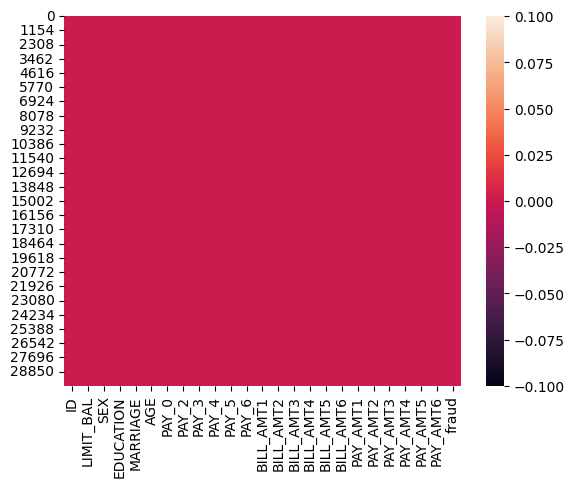

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull());

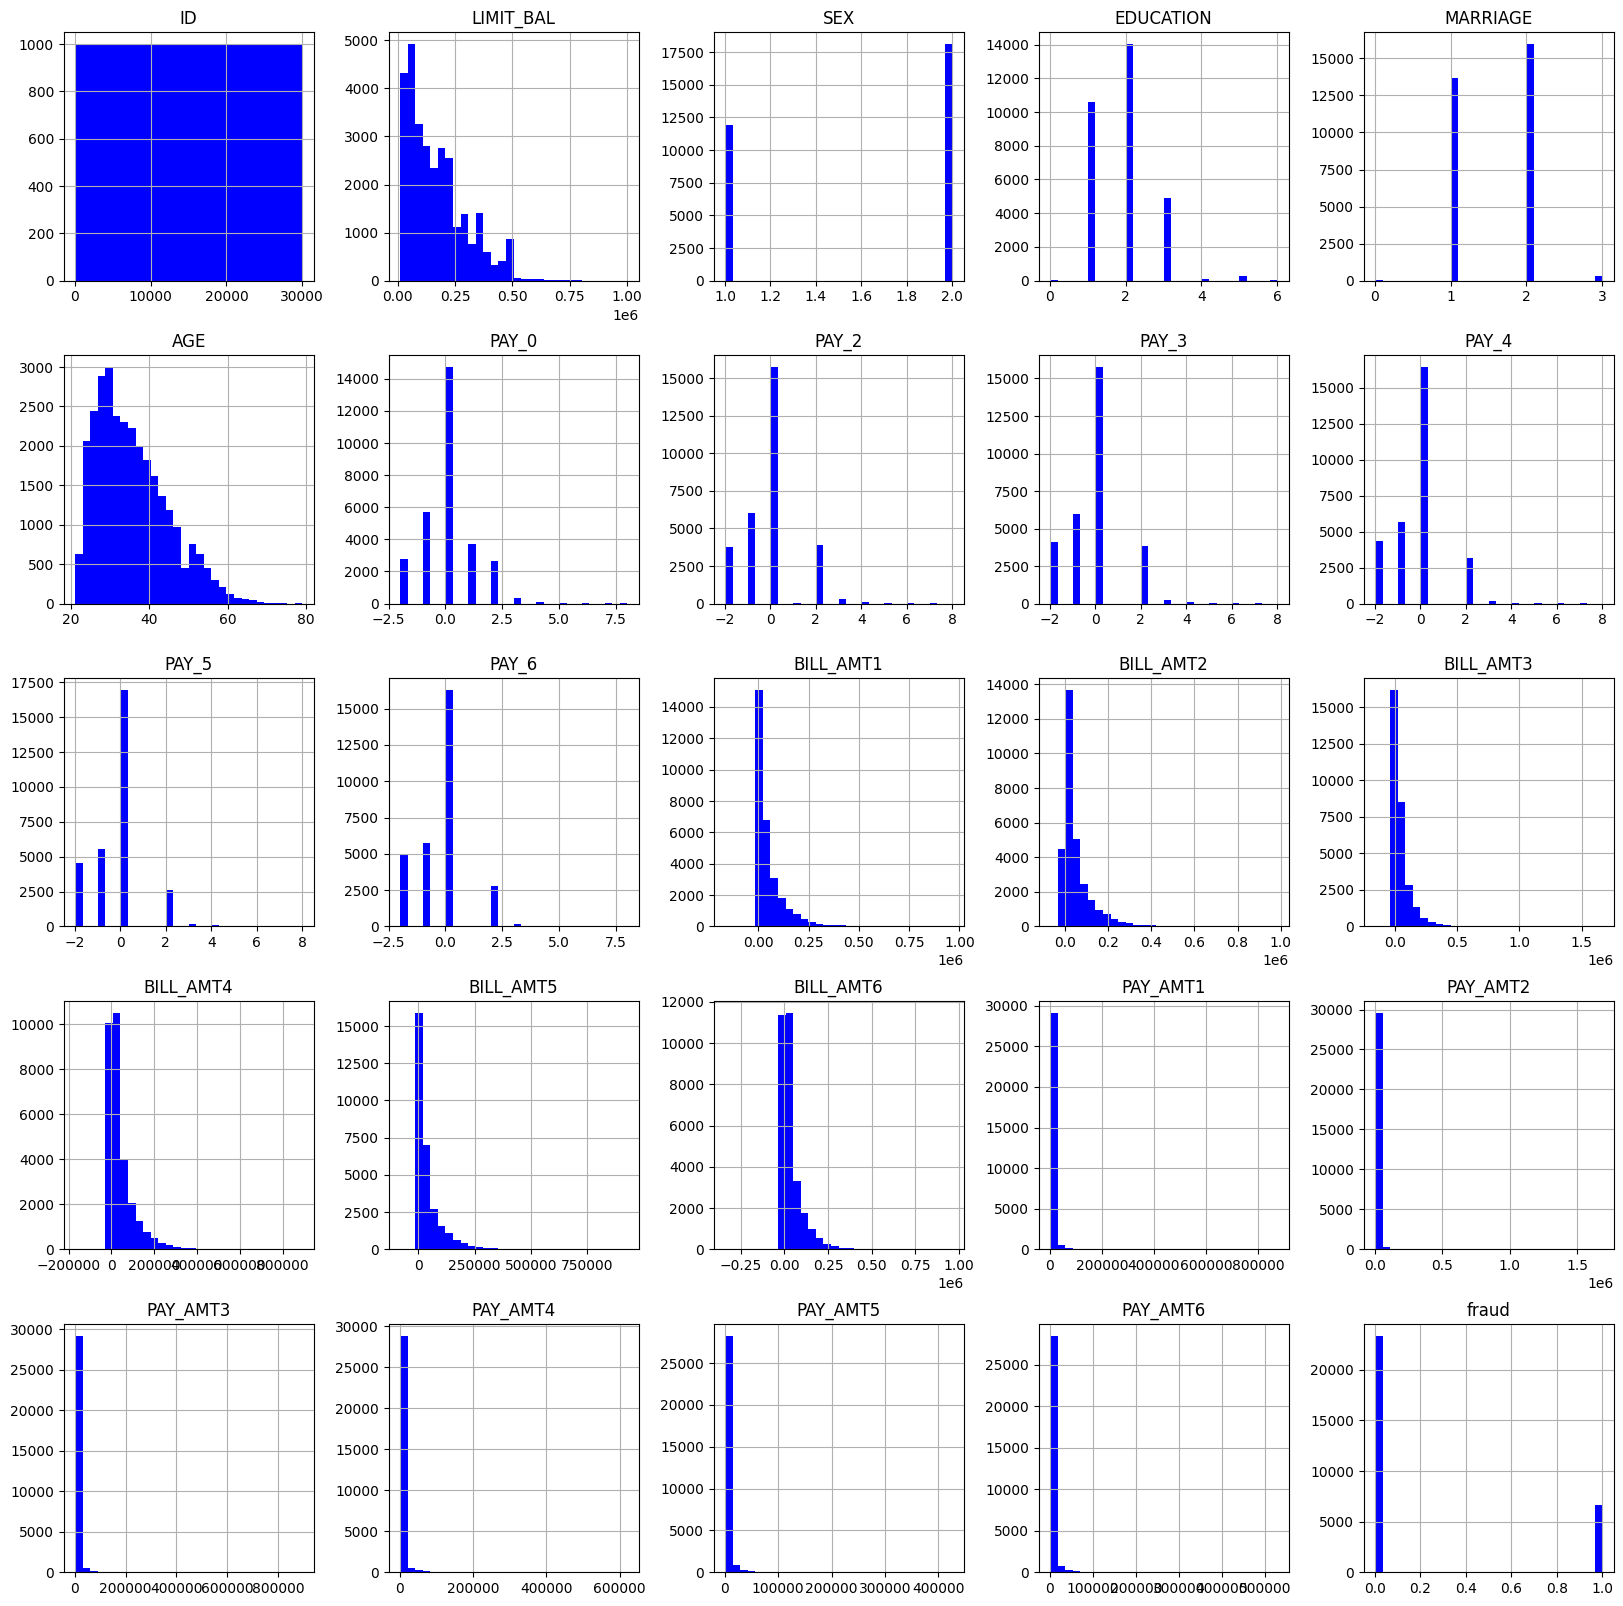

In [ ]:
# Plot Histogram
creditcard_df.hist(bins = 30, figsize = (20,20), color = 'b');

In [ ]:
creditcard_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,fraud
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
# It seems that we are dealing with an imbalanced dataset

# Segregate the dataset into fraudulent and non-fraudulent transactions
fraudulent_transactions_df = creditcard_df[creditcard_df['fraud'] == 1]
legitimate_transactions_df = creditcard_df[creditcard_df['fraud'] == 0]

# Count and calculate the percentages
total_transactions = len(creditcard_df)
num_fraudulent_transactions = len(fraudulent_transactions_df)
percent_fraudulent_transactions = (num_fraudulent_transactions / total_transactions) * 100

num_legitimate_transactions = len(legitimate_transactions_df)
percent_legitimate_transactions = (num_legitimate_transactions / total_transactions) * 100

# Display the results
print("Total number of transactions =", total_transactions)
print("Number of fraudulent transactions =", num_fraudulent_transactions)
print("Percentage of fraudulent transactions =", percent_fraudulent_transactions, "%")
print("Number of legitimate transactions =", num_legitimate_transactions)
print("Percentage of legitimate transactions =", percent_legitimate_transactions, "%")

# Output
# Total number of transactions = 30000
# Number of fraudulent transactions = 6636
# Percentage of fraudulent transactions = 22.12 %
# Number of legitimate transactions = 23364
# Percentage of legitimate transactions = 77.88 %

Total number of transactions = 30000
Number of fraudulent transactions = 6636
Percentage of fraudulent transactions = 22.12 %
Number of legitimate transactions = 23364
Percentage of legitimate transactions = 77.88000000000001 %


In [ ]:
# Let's compare the mean and std for fraudulent_transactions
fraudulent_transactions_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,fraud
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,8571.616622,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7408.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14758.500000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,21831.750000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [ ]:
# Let's compare the mean and std for legitimate_transactions
legitimate_transactions_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,fraud
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,8684.552145,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,7526.750000,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,15073.500000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,22637.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,29997.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


                 ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION  0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_0     -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2     -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3     -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4     -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5     -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6     -0.020270  -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_AMT1  0.019389   0.2

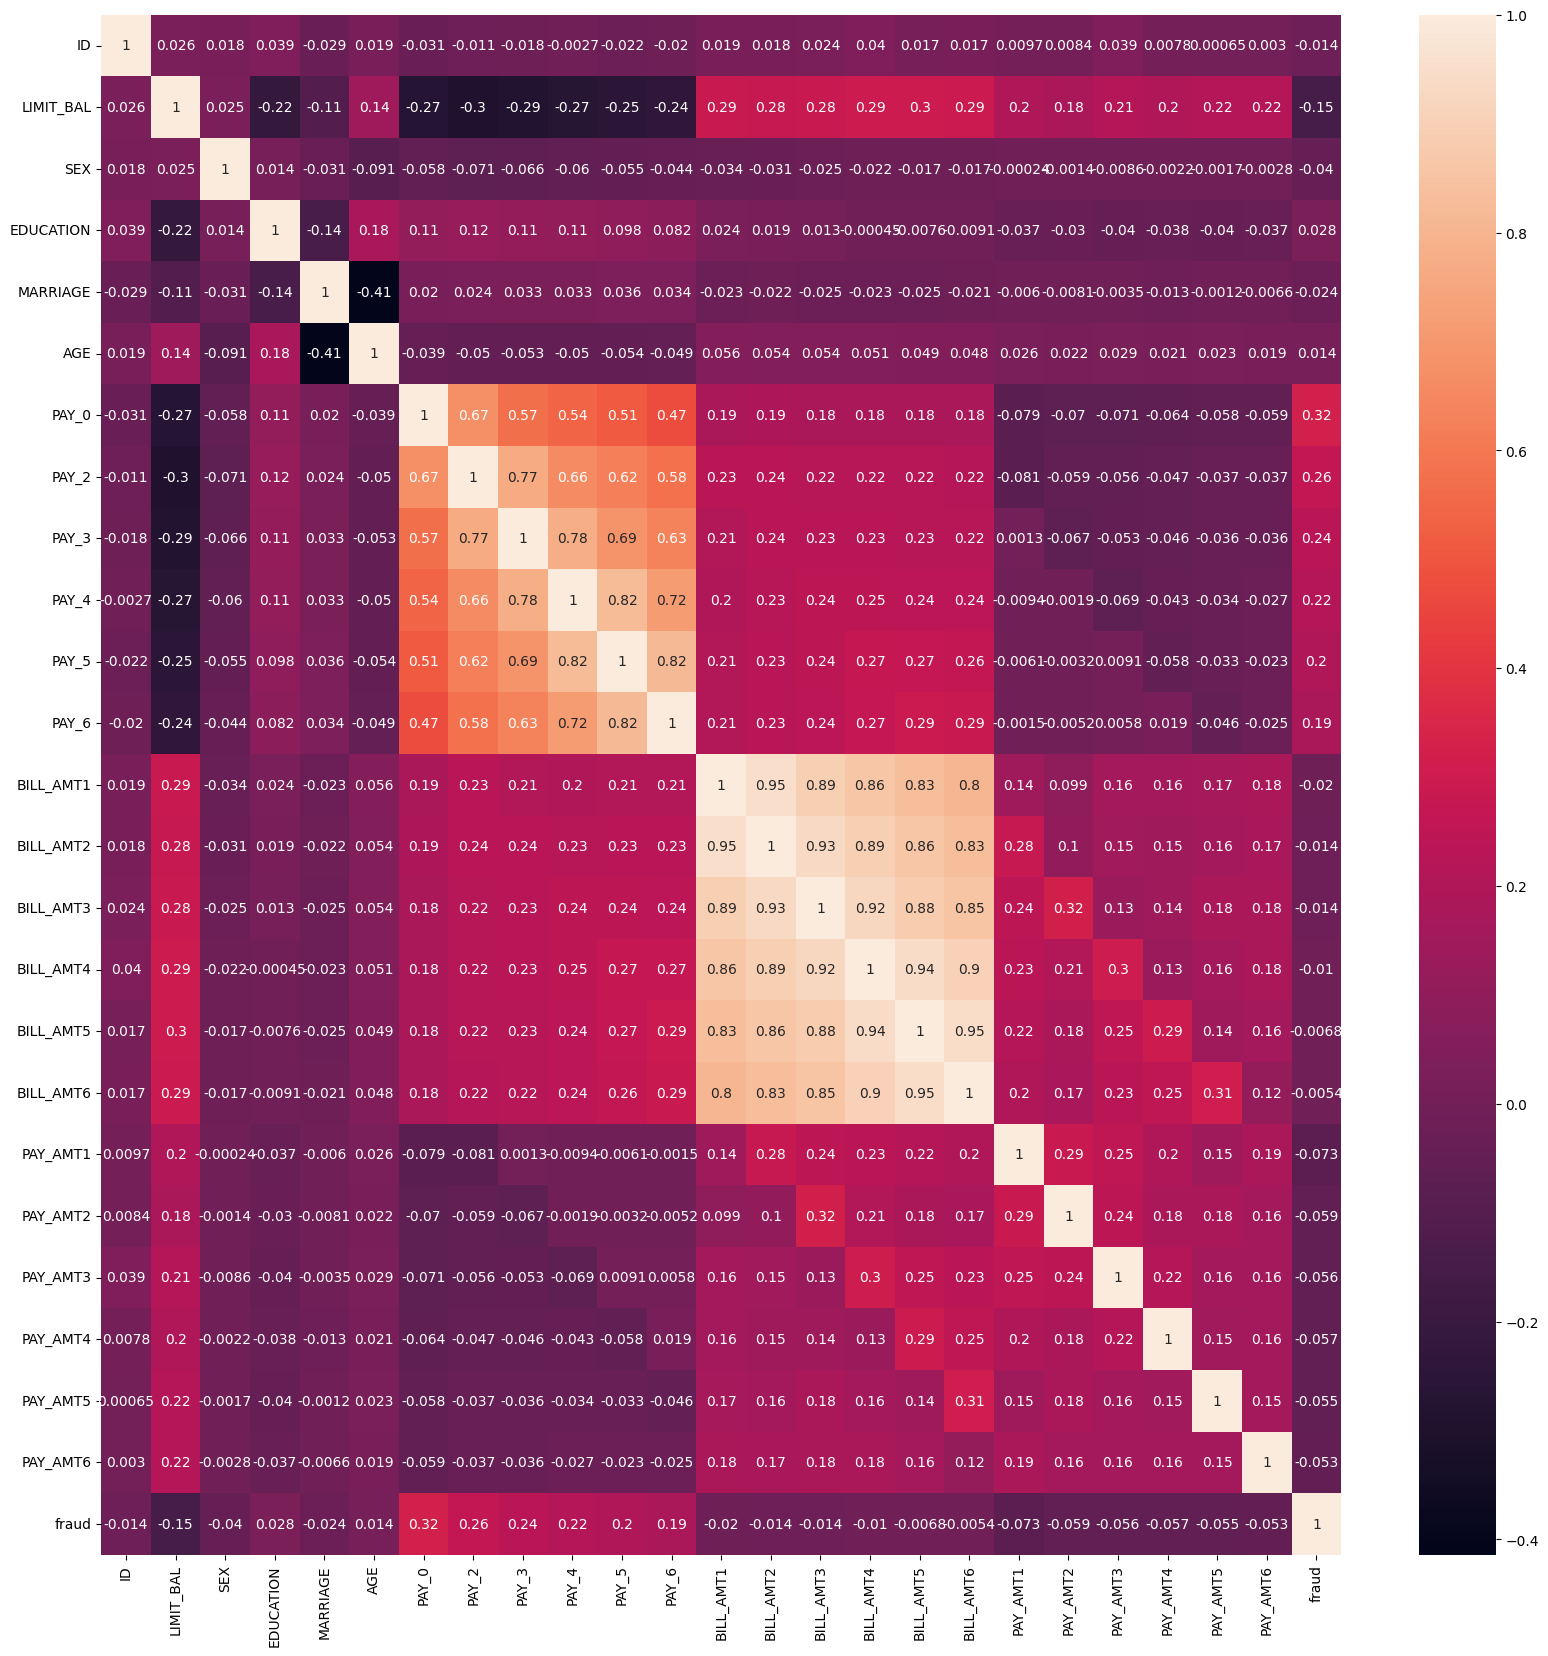

In [ ]:
# Plot the correlation matrix
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

# Print the correlation matrix
print(correlations)


Summary Statistics for Transaction Limits by Marital Status:
            count           mean            std      min      25%       50%  \
MARRIAGE                                                                      
0            54.0  132962.962963   84331.547615  10000.0  70000.0  115000.0   
1         13659.0  182200.893184  133382.262668  10000.0  70000.0  160000.0   
2         15964.0  156413.660737  125673.426316  10000.0  50000.0  130000.0   
3           323.0   98080.495356   96542.879913  10000.0  30000.0   60000.0   

               75%        max  
MARRIAGE                       
0         200000.0   360000.0  
1         260000.0  1000000.0  
2         220000.0   800000.0  
3         130000.0   500000.0  


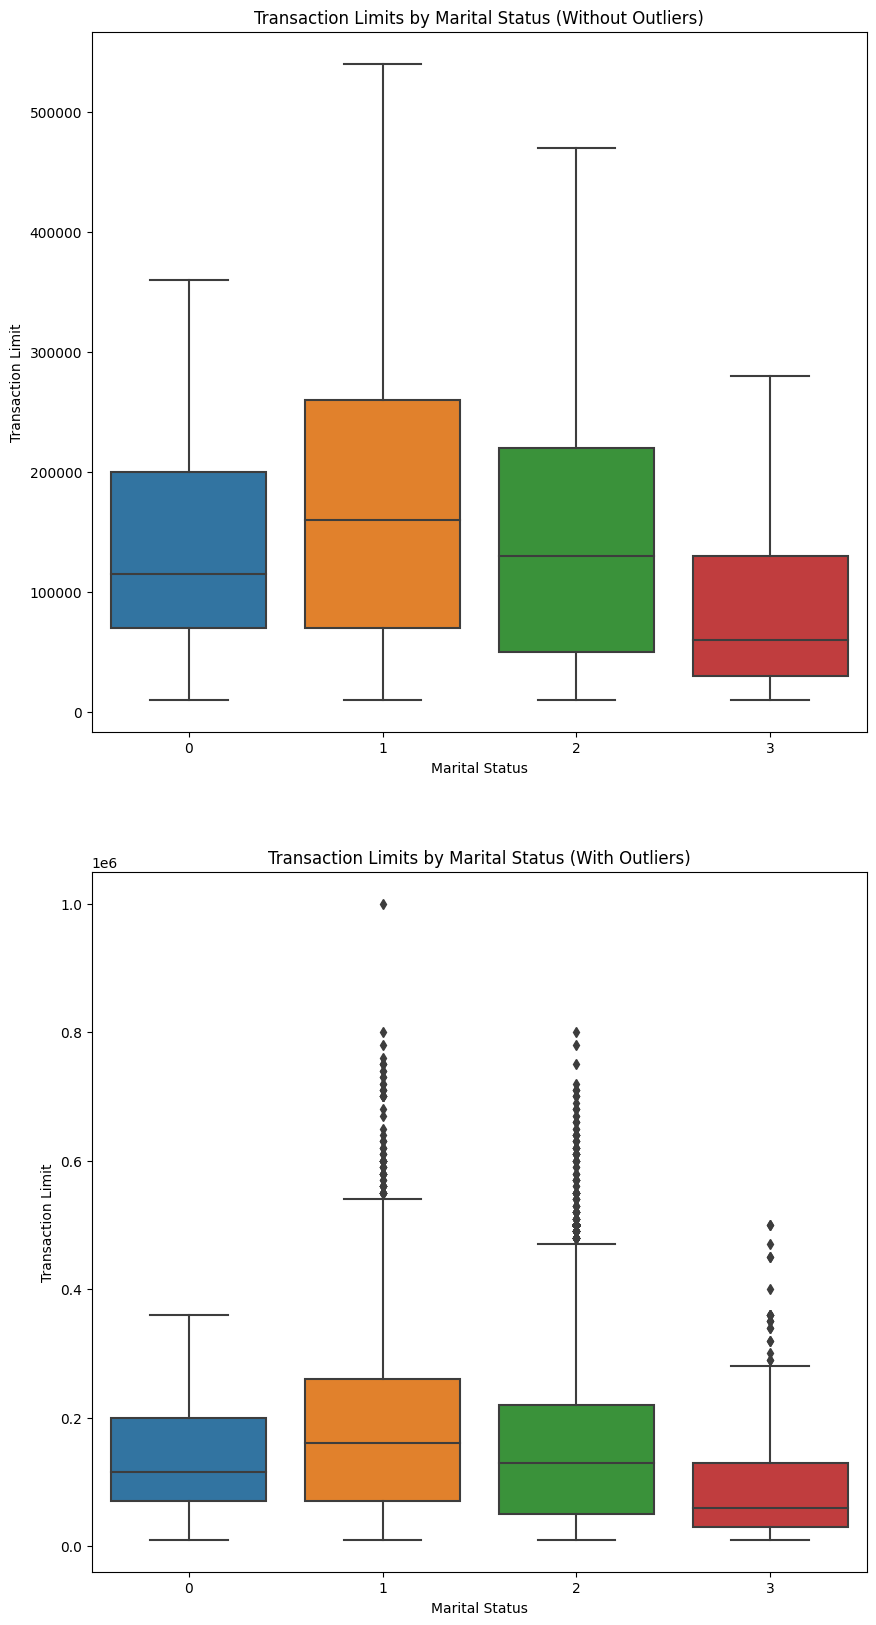

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group the data by 'MARRIAGE' and calculate summary statistics for 'LIMIT_BAL'
grouped_data = creditcard_df.groupby('MARRIAGE')['LIMIT_BAL'].describe()

# Print the summary statistics
print("Summary Statistics for Transaction Limits by Marital Status:")
print(grouped_data)

plt.figure(figsize=[10, 20])

# Analyzing transaction limits based on marital status without outliers
plt.subplot(211)
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=creditcard_df, showfliers=False)
plt.title("Transaction Limits by Marital Status (Without Outliers)")
plt.xlabel("Marital Status")
plt.ylabel("Transaction Limit")

# Analyzing transaction limits based on marital status including outliers
plt.subplot(212)
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=creditcard_df)
plt.title("Transaction Limits by Marital Status (With Outliers)")
plt.xlabel("Marital Status")
plt.ylabel("Transaction Limit")

plt.show()


# FINAL PROJECT TASK #2: PREPARE TRAINING AND TESTING DATASET

In machine learning, preprocessing data is a critical step, especially when dealing with different types of variables like int64 and float64. The need for specific preprocessing techniques like one-hot encoding or scaling (e.g., using MinMaxScaler) depends on the context of your dataset and the type of machine learning model you are using. Here's a brief overview:

***Scaling (e.g., MinMaxScaler):***

- *Purpose:* Scaling transforms numerical features to a common scale, which is crucial for models sensitive to the magnitude of features, like Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and many neural network architectures.

- *When to Use:* If your dataset contains features with differing scales (e.g., age ranging from 0 to 100 and salary ranging from thousands to millions), scaling ensures that these features contribute equally to the model's training process.

- *Types:* Apart from MinMaxScaler, other common scalers include StandardScaler, RobustScaler, etc. The choice depends on the dataset and the specific requirements of your model.

***One-Hot Encoding:***

- Purpose: One-hot encoding is used to convert categorical variables into a form that could be provided to machine learning algorithms to do a better job in prediction.

- When to Use: It’s particularly useful for categorical variables where no ordinal relationship exists (e.g., country names, color names). By one-hot encoding, each unique category value is transformed into a binary vector.
- Implementation: In pandas, you can use pd.get_dummies() for one-hot encoding.

***Normalization/Standardization:***

- Normalization: Often used interchangeably with scaling, it typically refers to the process of scaling individual samples to have unit norm.

- Standardization (e.g., StandardScaler): It involves rescaling the feature to have a mean of 0 and a standard deviation of 1. It’s beneficial for models that assume the input features are normally distributed.

***Handling Mixed Data Types (int64 and float64):***

- Numerical features (int64 and float64): You might need to scale them, especially if they're on different scales.

- Categorical features encoded as integers: They should be one-hot encoded or treated with other encoding strategies like label encoding or binary encoding, depending on the model requirements.

***Model-Specific Considerations:***

- Tree-Based Models: Models like Decision Trees, Random Forests, and Gradient Boosted Trees are less sensitive to the scale of features. Hence, scaling might not be necessary.

- Linear Models and Neural Networks: Highly benefit from scaling and normalization as it can speed up training and convergence.


***Data Quality Checks:***

Ensure there are no missing values, outliers, or erroneous entries in the dataset. Techniques like imputation, outlier detection, and removal or correction of incorrect entries are important.

In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
!pip install imbalanced-learn


# FINAL PROJECT TASK #3: TRAIN AN XG-BOOST CLASSIFIER MODEL

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess the data
# Assuming 'ID' is just an identifier and can be dropped
X = creditcard_df.drop(columns=['ID', 'fraud'])
y = creditcard_df['fraud']

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (24000, 23)
Testing set shape: (6000, 23)


In [ ]:
import xgboost as xgb

# Train an XGBoost classifier model
model_xgb_smote = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')
model_xgb_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test set
y_predict_smote = model_xgb_smote.predict(X_test)

In [ ]:
y_predict_smote

array([0, 0, 0, ..., 0, 0, 0])

y_predict_smote: This line refers to the array of predictions made by your model on the X_test dataset. If this line is executed on its own, it will display the predictions made by your model. This is useful for examining the specific predictions your model has made.

In [ ]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
2210     0
14144    1
23108    0
25703    0
29171    0
Name: fraud, Length: 6000, dtype: int64

y_test: Similar to y_predict_smote, this line will display the actual target values in your test dataset. It's crucial to compare these actual values (y_test) with the predicted values (y_predict_smote) to evaluate the model's performance.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format( 100 * accuracy_score(y_predict_smote, y_test)))

Accuracy 80.21666666666667 %


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      4687
           1       0.56      0.47      0.51      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.80      0.80      6000



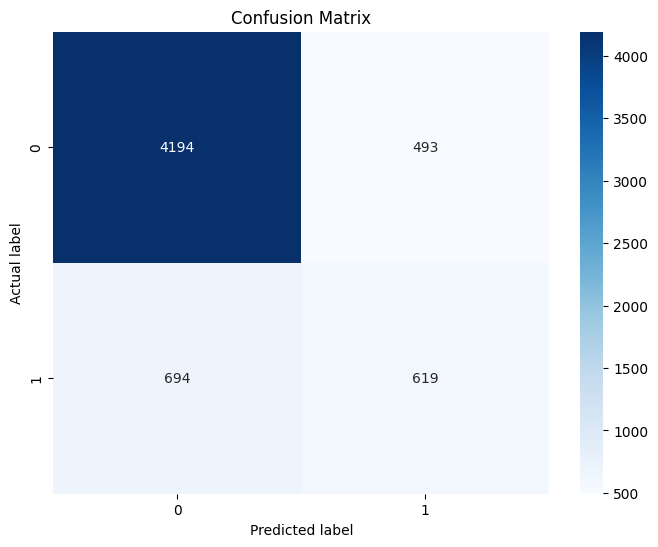

Training Accuracy: 0.855490710499545
Test Accuracy: 0.8021666666666667


In [ ]:
# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_predict_smote))
cm_smote = confusion_matrix(y_test, y_predict_smote)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Checking for overfitting
y_train_pred = model_xgb_smote.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_predict_smote)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# FINAL PROJECT TASK #4: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
X_train

array([[7.07070707e-02, 1.00000000e+00, 3.33333333e-01, ...,
        1.96135266e-03, 3.38781185e-03, 1.66078394e-03],
       [2.02020202e-02, 0.00000000e+00, 3.33333333e-01, ...,
        1.53784219e-03, 0.00000000e+00, 0.00000000e+00],
       [1.71717172e-01, 1.00000000e+00, 8.33333333e-01, ...,
        1.10805153e-02, 2.42421969e-02, 3.44262729e-04],
       ...,
       [4.04040404e-02, 0.00000000e+00, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.06060606e-02, 1.00000000e+00, 3.33333333e-01, ...,
        1.93236715e-03, 0.00000000e+00, 2.26986415e-03],
       [1.51515152e-01, 1.00000000e+00, 3.33333333e-01, ...,
        2.65700483e-03, 3.32919919e-02, 2.83733019e-03]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter = 10000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_predict = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.34      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



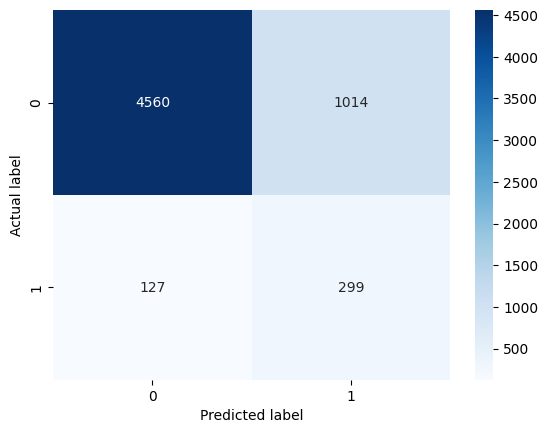

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# FINAL PROJECT TASK #5: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=1000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [ ]:
y_predict = model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



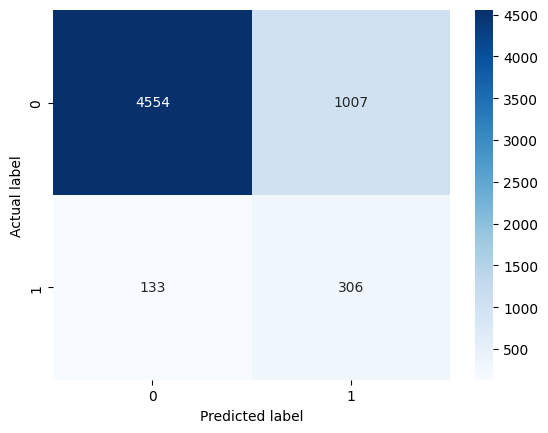

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# FINAL PROJECT TASK #6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



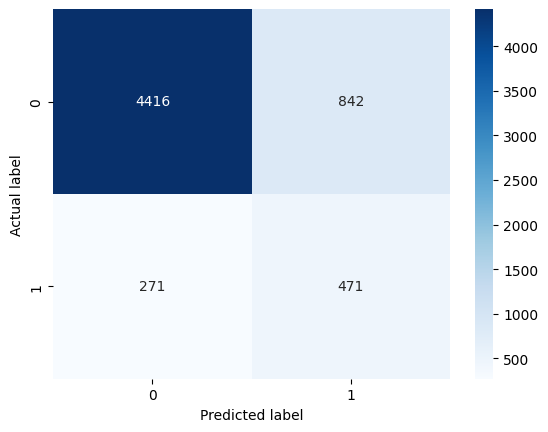

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# FINAL PROJECT TASK #7: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4687
           1       0.56      0.36      0.44      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



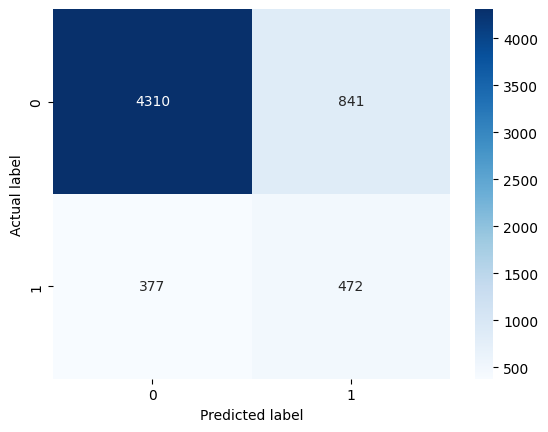

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# FINAL PROJECT TASK #8: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predict = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      4687
           1       0.40      0.65      0.49      1313

    accuracy                           0.71      6000
   macro avg       0.64      0.69      0.64      6000
weighted avg       0.77      0.71      0.73      6000



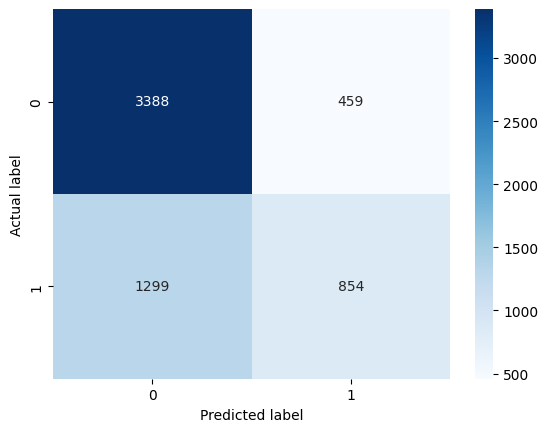

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# FINAL PROJECT TASK #9: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb_smote.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb_smote.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("XG-Boost Classifier: ", auc_score0) # XG-Boost
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

XG-Boost Classifier:  0.7637691457842836
Logistic Regression:  0.7217193088562601
Support Vector Machine:  0.7210803780481445
Random Forest:  0.7604943004024517
K-Nearest Neighbors:  0.7053016145027544
Naive Bayes:  0.7370833848578273


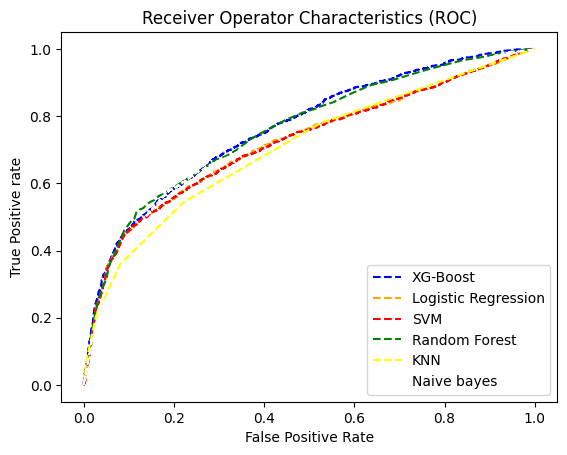

In [ ]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# **Final Project Lab: Predicting the Health Insurance Cost using AutoGluon**

# **CODING TASK #1: IMPORT LIBRARIES AND DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Installing Important Packages**

In [ ]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df

PRACTICE OPPORTUNITY #1 [OPTIONAL]:

- How many unique regions do we have in the insurance_df DataFrame?

# **CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS**

In [ ]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

In [ ]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

In [ ]:
# Generate statistical summary
insurance_df.describe()

In [ ]:
# Obtain dataset information
insurance_df.info()

In [ ]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

PRACTICE OPPORTUNITY #2 [OPTIONAL]:

- Group data by 'age' and examine the relationship between 'age' and 'charges'

# **CODING TASK #3: PERFORM DATA VISUALIZATION**

In [ ]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# check if there are any Null values
insurance_df.isnull().sum()

In [ ]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


In [ ]:
# plot pairplot
sns.pairplot(insurance_df)

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


PRACTICE OPPORTUNITY #3 [OPTIONAL]:

- Calculate and plot the correlation matrix
- Which feature has the most positive correlation with charges?

# **CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON**

In [ ]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

In [ ]:
predictor.fit_summary()

# **CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE**

In [ ]:
predictor.leaderboard()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(X_test)

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

In [ ]:
X_test

In [ ]:
y_test = X_test['charges']
y_test #groundtruth

In [ ]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

PRACTICE OPPORTUNITY #4 [OPTIONAL]:

- Retrain a regressor model using AutoGluon with different preset value
- Set the limit_time to 300 secs
- Use RMSE as the key metric and plot the barchart
- Which model provides the best performance?
- Assess trained model performance by comparing various metrics

# **PRACTICE OPPORTUNITY SOLUTIONS**

PRACTICE OPPORTUNITY #1 SOLUTION:

- How many unique regions do we have in the insurance_df?

In [ ]:
insurance_df['region'].unique()

PRACTICE OPPORTUNITY #2 SOLUTION:

- Group data by 'age' and examine the relationship between 'age' and 'charges'

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

PRACTICE OPPORTUNITY #3 SOLUTION:

- Calculate and plot the correlation matrix
- Which feature has the most positive correlation with charges?

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

PRACTICE OPPORTUNITY #4 SOLUTION:

- Retrain a regressor model using AutoGluon with different preset value
- Set the limit_time to 300 secs
- Use RMSE as the key metric and plot the barchart
- Which model provides the best performance?
- Assess trained model performance by comparing various metrics

In [ ]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)